In [1]:
from case_studies.dc2_new_diffusion.utils.diffusion import (linear_beta_schedule, 
                                                            cosine_beta_schedule, 
                                                            sigmoid_beta_schedule)
import torch
import matplotlib.pyplot as plt

In [2]:
def get_diff_params(beta_schedule):
    betas = beta_schedule(1000)
    alphas = 1.0 - betas
    alphas_cumprod = torch.cumprod(alphas, dim=0)
    sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
    sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)
    sqrt_recip_alphas_cumprod = torch.sqrt(1.0 / alphas_cumprod)
    sqrt_recipm1_alphas_cumprod = torch.sqrt(1.0 / alphas_cumprod - 1)

    return {
        "betas": betas,
        "alphas": alphas,
        "alphas_cumprod": alphas_cumprod,
        "sqrt_alphas_cumprod": sqrt_alphas_cumprod,
        "sqrt_one_minus_alphas_cumprod": sqrt_one_minus_alphas_cumprod,
        "sqrt_recip_alphas_cumprod": sqrt_recip_alphas_cumprod,
        "sqrt_recipm1_alphas_cumprod": sqrt_recipm1_alphas_cumprod
    }

In [3]:
linear_params = get_diff_params(linear_beta_schedule)
cosine_params = get_diff_params(cosine_beta_schedule)
sigmoid_params = get_diff_params(sigmoid_beta_schedule)

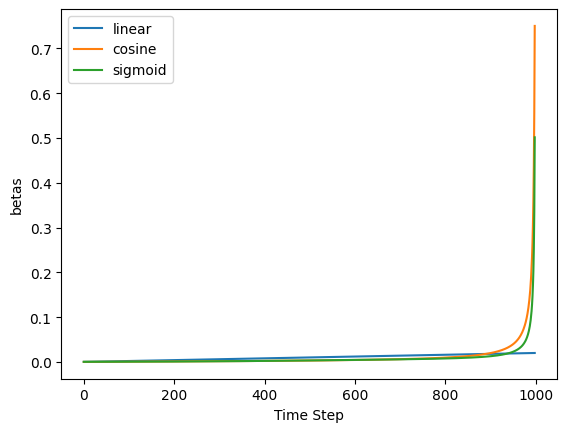

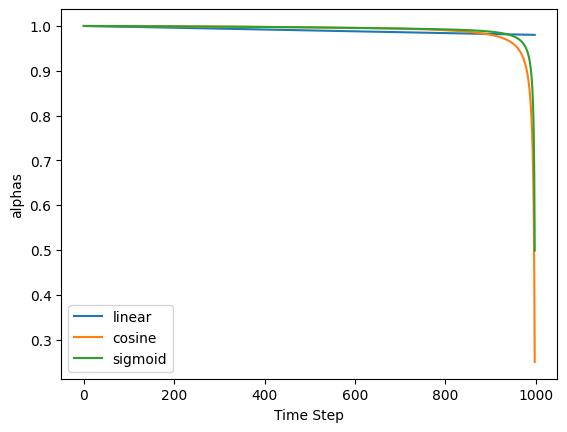

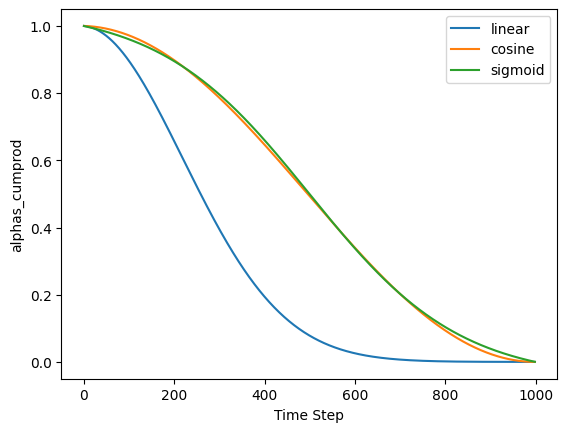

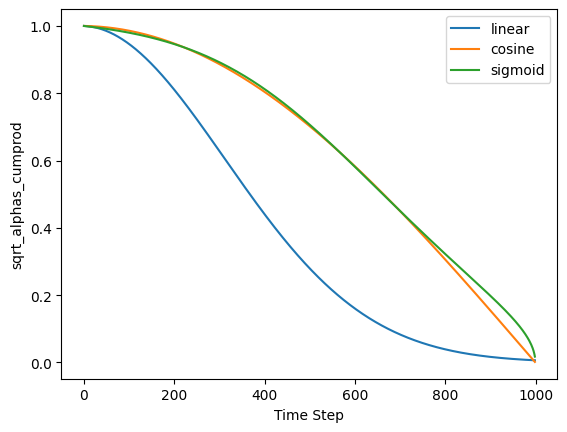

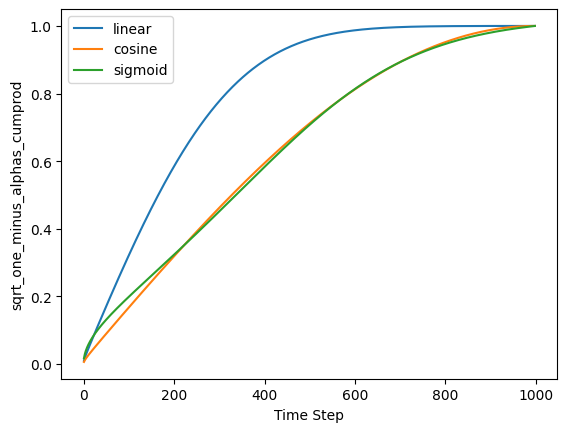

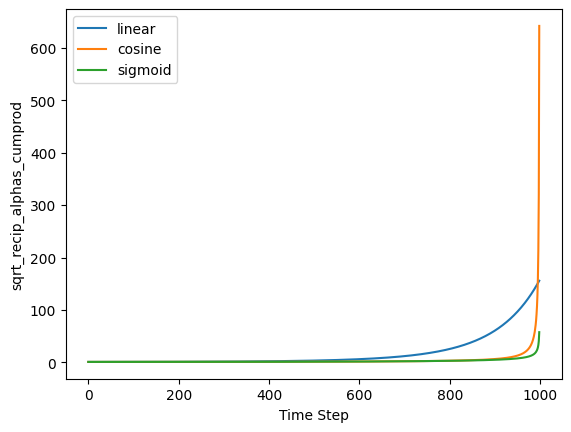

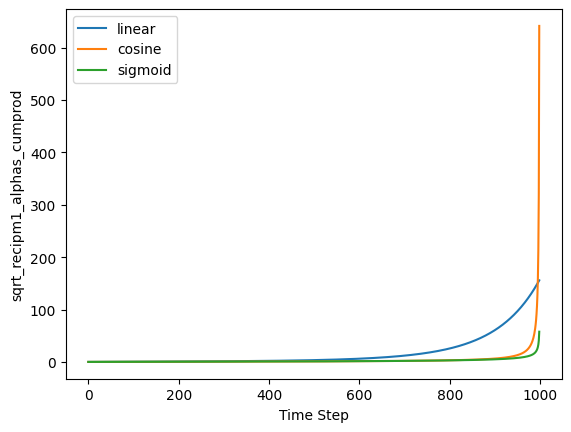

In [5]:
for k in linear_params.keys():
    plt.plot(linear_params[k][:-1], label="linear")
    plt.plot(cosine_params[k][:-1], label="cosine")
    plt.plot(sigmoid_params[k][:-1], label="sigmoid")
    plt.ylabel(k)
    plt.xlabel("Time Step")
    plt.legend()
    plt.show()